## International Trade - Export Graphs
## Eugene Miao

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import json

In [2]:
#Export data for HITECH Products:

url_hitechex="https://api.census.gov/data/timeseries/intltrade/exports/hitech?get=CTY_CODE,CTY_NAME,HITECH,HITECH_DESC,ALL_VAL_MO,ALL_VAL_YR&time=from+2017-01+to+2017-12&key=f71e81f058685a925a2f209f4ae23944770802fa"
export_hitechdata= requests.get(url_hitechex).json()
#print(json.dumps(export_hitechdata, indent=4, sort_keys=True))
Export_hicountrycode=[]
Export_hicountryname=[]
Export_hitechcode=[]
Export_hitechname=[]
Export_hitotalvalue=[]
Export_hiyear_date_value=[]
Export_hitime=[]
i=1
while i <len(export_hitechdata):
    Export_hicountrycode.append(export_hitechdata[i][0])
    Export_hicountryname.append(export_hitechdata[i][1])
    Export_hitechcode.append(export_hitechdata[i][2])
    Export_hitechname.append(export_hitechdata[i][3])
    Export_hitotalvalue.append(int(export_hitechdata[i][4]))
    Export_hiyear_date_value.append(int(export_hitechdata[i][5]))
    Export_hitime.append(export_hitechdata[i][6])
    i= i+1
export_hitechdata_df= pd.DataFrame({"Country Code":Export_hicountrycode,"Country Name":Export_hicountryname,"Hitech code":Export_hitechcode,"Hitech Name":Export_hitechname,"Total Value":Export_hitotalvalue,"Year to Date Total Value":Export_hiyear_date_value,"Time":Export_hitime})
export_hitechdata_df.head()

,Country Code,Country Name,Hitech Name,Hitech code,Time,Total Value,Year to Date Total Value
0,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-01,117458099885,117458099885
1,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-02,119251603769,236709703654
2,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-03,135904939630,372614643284
3,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-04,123841552401,496456195685
4,,TOTAL FOR ALL COUNTRIES,TOTAL FOR ALL COMMODITIES,,2017-05,127781985882,624238181567


In [3]:
#as Hitech Products start with code 01-10 so have to clean the data 
hitechex_df=export_hitechdata_df[(export_hitechdata_df["Hitech code"] !="") & (export_hitechdata_df["Hitech code"] !="00") & (export_hitechdata_df["Country Name"] !="TOTAL FOR ALL COUNTRIES")]
#hitech_df.head(150)
#Group by Hitech Code, Hitech Name and Country Name to find largest hitech products export to U.S in 2017
hitechex_group=hitechex_df.groupby(["Hitech code","Country Name","Hitech Name"]).sum()
#hitech_group.head(200)
hitechex_group.reset_index(inplace=True)

#Find largest hitech products imports into US,2017
bioim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "BIOTECHNOLOGY [01]"].nlargest(1,'Total Value')
lifescim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "LIFE SCIENCE [02]"].nlargest(1,'Total Value')
optoim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "OPTO-ELECTRONICS [03]"].nlargest(1,'Total Value')
ictim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "INFORMATION & COMMUNICATIONS [04]"].nlargest(1,'Total Value')
elecim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "ELECTRONICS [05]"].nlargest(1,'Total Value')
flexim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "FLEXIBLE MANUFACTURING [06]"].nlargest(1,'Total Value')
advmatim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "ADVANCED MATERIALS [07]"].nlargest(1,'Total Value')
aeroim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "AEROSPACE [08]"].nlargest(1,'Total Value')
wpim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "WEAPONS [09]"].nlargest(1,'Total Value')
nuclim_largest_ex = hitechex_group[hitechex_group["Hitech Name"] == "NUCLEAR TECHNOLOGY [10]"].nlargest(1,'Total Value')

largestex =pd.concat([bioim_largest_ex,lifescim_largest_ex,optoim_largest_ex,ictim_largest_ex,elecim_largest_ex,flexim_largest_ex,advmatim_largest_ex,aeroim_largest_ex,wpim_largest_ex,nuclim_largest_ex])
largestex["Total Value"] = round(largestex["Total Value"]/1000000,2)
largestex

,Hitech code,Country Name,Hitech Name,Total Value,Year to Date Total Value
123,01,OECD,BIOTECHNOLOGY [01],16400.33,112202738578
340,02,OECD,LIFE SCIENCE [02],19812.53,126913831880
422,03,APEC,OPTO-ELECTRONICS [03],3133.41,19894939004
631,04,APEC,INFORMATION & COMMUNICATIONS [04],62621.98,394930667051
874,05,APEC,ELECTRONICS [05],40635.28,260450184270
1089,06,APEC,FLEXIBLE MANUFACTURING [06],16840.08,107706326837
1413,07,OECD,ADVANCED MATERIALS [07],1918.70,12612455268
1623,08,OECD,AEROSPACE [08],74039.54,470675439044
1706,09,ASIA,WEAPONS [09],3108.54,16780711578
1847,10,APEC,NUCLEAR TECHNOLOGY [10],602.33,4668818147


In [4]:
#Ensure all export HS codes are properly added into a DataFrame
df = pd.read_csv('Aerospace.csv')

Exportdetail_totalvalue=[]
Exportdetail_time=[]
Exportdetail_CTYNAME=[]
Hitechdetail=[]
Hitechdetaildesc=[]

print(len(df))
for i in range(len(df)):
    checkerror = False
    check=df["Aerospace code"][i]
    try:
        export_datacode = requests.get(f"https://api.census.gov/data/timeseries/intltrade/exports/hs?get=CTY_CODE,CTY_NAME,ALL_VAL_MO&time=2017&CTY_NAME=OECD&E_COMMODITY={check}&key=f71e81f058685a925a2f209f4ae23944770802fa").json()
    except Exception:
        checkerror = True
        print("Aerospace code is error or null of value")
    if checkerror == False :
        c=1
        while c < len(export_datacode):
            Hitechdetaildesc.append(df["Aerospace desc"][i])
            Exportdetail_totalvalue.append(int(export_datacode[c][2]))
            Exportdetail_time.append(export_datacode[c][3])
            Exportdetail_CTYNAME.append(export_datacode[c][4])
            Hitechdetail.append(export_datacode[c][5])
            c=c+1
export_hitechdetails= pd.DataFrame({"Hitech detail Code":Hitechdetail,"Hitech detail desc":Hitechdetaildesc,"Country Name":Exportdetail_CTYNAME,"Total Value":Exportdetail_totalvalue,"Time":Exportdetail_time})

print(sum(Exportdetail_totalvalue))
export_hitechdetails.head()

52
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace code is error or null of value
Aerospace cod

,Country Name,Hitech detail Code,Hitech detail desc,Time,Total Value
0,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-01,3002584
1,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-02,4862673
2,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-03,1517736
3,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-04,4524940
4,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-05,3881572


In [5]:
#Further breakdown the dataframe into only the Hitech detail code, Hitech detail description, and Total Value
export_hitechdetails.to_csv('export_hs_2017.csv', encoding='utf-8', index=False)

aerodetail_plot = export_hitechdetails.groupby(["Hitech detail Code","Hitech detail desc"]).sum()
aerodetail_plot.reset_index(inplace=True)

top10Aeroproducts = aerodetail_plot.nlargest(10,'Total Value')
top10Aeroproducts

,Hitech detail Code,Hitech detail desc,Total Value
5,8800000000,"CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS",66522004223
13,8803300060,"OTHER PARTS,NESOI,OF MILITARY AIRPLANES/HELICO...",3081123148
2,8411917050,"PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX C...",1053078387
3,8411997050,"PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C",661104074
6,8802120020,"NEW HELICOPTERS, MILITARY, UNLAD WGT > 2,000 KG",561534070
7,8802300010,"NEW MILITARY AIRCRAFT FIGHTERS,WT(2000-15000 KG)",539579448
9,8802400020,"NEW MILITARY CARGO TRANSPORTS,WEIGHT GT 15,000 KG",254562565
16,9014208080,"INST & APPLN, AERONAUTICAL/SPACE NAVIGATION, N...",241422580
11,8803100060,PROPLLRS & ROTORS & PRTS THEREOF FOR MLTARY AI...,164125134
12,8803200060,UNDERCARRIAGES & PARTS THEREOF FOR MILITRY AIR...,158285767


In [6]:
#Identify the top 10 products
top10index = top10Aeroproducts[['Hitech detail Code']]
top10index

,Hitech detail Code
5,8800000000
13,8803300060
2,8411917050
3,8411997050
6,8802120020
7,8802300010
9,8802400020
16,9014208080
11,8803100060
12,8803200060


In [7]:
#Merge all values from the top 10 products
merged_top10 = pd.merge(top10index, export_hitechdetails, on = 'Hitech detail Code', how='left')
merged_top10[['Hitech detail Code', 'Hitech detail desc', 'Time', 'Total Value']]

#Create a pivot table for ease of review
df = merged_top10.pivot('Time', 'Hitech detail desc', 'Total Value')
df

Hitech detail desc,"CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS","INST & APPLN, AERONAUTICAL/SPACE NAVIGATION, NESOI","NEW HELICOPTERS, MILITARY, UNLAD WGT > 2,000 KG","NEW MILITARY AIRCRAFT FIGHTERS,WT(2000-15000 KG)","NEW MILITARY CARGO TRANSPORTS,WEIGHT GT 15,000 KG","OTHER PARTS,NESOI,OF MILITARY AIRPLANES/HELICOPTRS","PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C","PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX CIVIL",PROPLLRS & ROTORS & PRTS THEREOF FOR MLTARY AIRCFT,UNDERCARRIAGES & PARTS THEREOF FOR MILITRY AIRCRFT
Time,,,,,,,,,,
2017-01,4.802495e+09,17894273.0,107799472.0,NaN,NaN,202943451.0,47296948.0,94571651.0,11267516.0,11520151.0
2017-02,4.894495e+09,19700194.0,24345697.0,179859816.0,NaN,256633641.0,35649327.0,63153928.0,12110522.0,12164871.0
2017-03,5.978378e+09,22270497.0,170910987.0,134894862.0,31649564.0,273348394.0,105661281.0,85186934.0,15173142.0,17410168.0
2017-04,5.614973e+09,21123439.0,24345697.0,0.0,63346471.0,261992407.0,63013224.0,71899155.0,14111516.0,12971897.0
2017-05,5.376678e+09,17810548.0,102109825.0,134894862.0,0.0,280612461.0,42042019.0,89069067.0,18640226.0,8927704.0
2017-06,5.123417e+09,21111881.0,0.0,89929908.0,31649564.0,296476505.0,84472216.0,93783533.0,11843756.0,15414121.0
2017-07,5.444838e+09,20292797.0,48691394.0,0.0,0.0,231657039.0,38442710.0,73198381.0,10903309.0,13954925.0
2017-08,5.362537e+09,17445615.0,0.0,0.0,0.0,221848883.0,37891204.0,75987054.0,11801767.0,10219131.0
2017-09,5.910992e+09,19428758.0,0.0,0.0,0.0,260026104.0,63880539.0,100362542.0,14444046.0,12275493.0


In [8]:
#Create list of products to loop through, essentially the columns
products = list(df.columns)
products

['CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS',
 'INST & APPLN, AERONAUTICAL/SPACE NAVIGATION, NESOI',
 'NEW HELICOPTERS, MILITARY, UNLAD WGT > 2,000 KG',
 'NEW MILITARY AIRCRAFT FIGHTERS,WT(2000-15000 KG)',
 'NEW MILITARY CARGO TRANSPORTS,WEIGHT GT 15,000 KG',
 'OTHER PARTS,NESOI,OF MILITARY AIRPLANES/HELICOPTRS',
 'PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C',
 'PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX CIVIL',
 'PROPLLRS & ROTORS & PRTS THEREOF FOR MLTARY AIRCFT',
 'UNDERCARRIAGES & PARTS THEREOF FOR MILITRY AIRCRFT']

In [9]:
df['CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS']

Time
2017-01    4.802495e+09
2017-02    4.894495e+09
2017-03    5.978378e+09
2017-04    5.614973e+09
2017-05    5.376678e+09
2017-06    5.123417e+09
2017-07    5.444838e+09
2017-08    5.362537e+09
2017-09    5.910992e+09
2017-10    6.126368e+09
2017-11    5.904281e+09
2017-12    5.982551e+09
Name: CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS, dtype: float64

In [10]:
df.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='Time')

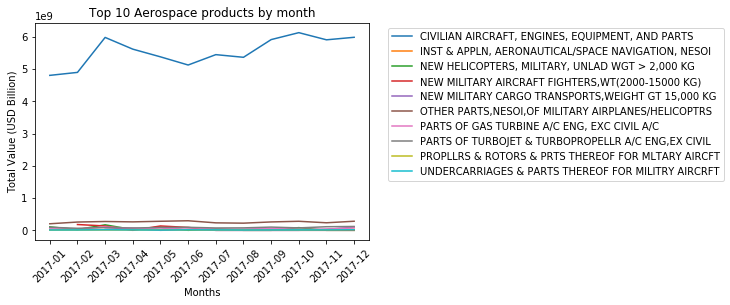

In [11]:
#Plot top 10 Aerospace products by month

for product in products:
    plt.plot(df.index, df[product], label = product)

plt.xticks(rotation=45)
#plt.legend(loc = "best")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Top 10 Aerospace products by month')
plt.ylabel('Total Value (USD Billion)')
plt.xlabel('Months')
plt.savefig('export top 10.png', bbox_inches="tight")
plt.show()

In [12]:
#Further breakdown the information, by splitting it to the Top 5 aerospace products
top5index = top10index[:5]

merged_top5 = pd.merge(top5index, export_hitechdetails, on = 'Hitech detail Code', how='left')
merged_top5[['Hitech detail Code', 'Hitech detail desc', 'Time', 'Total Value']]
merged_top5.head()

,Hitech detail Code,Country Name,Hitech detail desc,Time,Total Value
0,8800000000,OECD,"CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS",2017-01,4802494623
1,8800000000,OECD,"CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS",2017-02,4894494810
2,8800000000,OECD,"CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS",2017-03,5978378411
3,8800000000,OECD,"CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS",2017-04,5614973041
4,8800000000,OECD,"CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS",2017-05,5376678338


In [13]:
#Among the top 5 products, identify the total value of each product by the month
count = 0
for product in list(top5index['Hitech detail Code']): 
    if count == 0:
        df_others = export_hitechdetails[export_hitechdetails['Hitech detail Code'] != product]
        count += 1
    else:
        df_others = df_others[df_others['Hitech detail Code'] != product]

df_others.head()

,Country Name,Hitech detail Code,Hitech detail desc,Time,Total Value
0,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-01,3002584
1,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-02,4862673
2,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-03,1517736
3,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-04,4524940
4,OECD,8411814050,"GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER",2017-05,3881572


In [14]:
#Sum the other Aerospace products that didn't make the top 5
df_others_sum = df_others.groupby('Time')['Total Value'].sum()
df_others_sum

Time
2017-01     68102431
2017-02    240293425
2017-03    241270334
2017-04    218385621
2017-05    228464927
2017-06    211425995
2017-07    102174367
2017-08     89408229
2017-09     98723761
2017-10     73739810
2017-11    110827984
2017-12    215929277
Name: Total Value, dtype: int64

In [15]:
#create pivot table for ease of understanding and preparation of graph
df_top5 = merged_top5.pivot('Time', 'Hitech detail desc', 'Total Value')
df_top5['Others'] = df_others_sum
df_top5

Hitech detail desc,"CIVILIAN AIRCRAFT, ENGINES, EQUIPMENT, AND PARTS","NEW HELICOPTERS, MILITARY, UNLAD WGT > 2,000 KG","OTHER PARTS,NESOI,OF MILITARY AIRPLANES/HELICOPTRS","PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C","PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX CIVIL",Others
Time,,,,,,
2017-01,4802494623,107799472,202943451,47296948,94571651,68102431
2017-02,4894494810,24345697,256633641,35649327,63153928,240293425
2017-03,5978378411,170910987,273348394,105661281,85186934,241270334
2017-04,5614973041,24345697,261992407,63013224,71899155,218385621
2017-05,5376678338,102109825,280612461,42042019,89069067,228464927
2017-06,5123417276,0,296476505,84472216,93783533,211425995
2017-07,5444838314,48691394,231657039,38442710,73198381,102174367
2017-08,5362537229,0,221848883,37891204,75987054,89408229
2017-09,5910992258,0,260026104,63880539,100362542,98723761


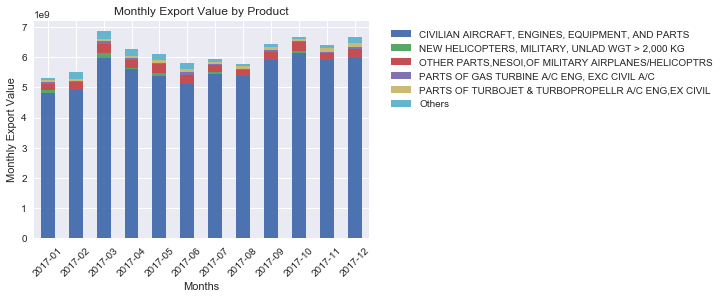

In [16]:
#Generate Monthly Export Value by Product graph, measuring how the top 5 items did comparatively
#as a whole for each export month

import seaborn as sns

sns.set()
#df_top5.set_index('ICT detail desc').T.plot(kind='bar', stacked=True)
df_top5.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=45)
plt.title('Monthly Export Value by Product')
plt.xlabel('Months')
plt.ylabel('Monthly Export Value')
plt.savefig('Monthly Export Volume.png', bbox_inches = "tight")